### Exploração Dataset Final

In [1]:
# Define required imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', palette='deep')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
dataset_final = pd.read_parquet('dataset_voos.parquet')

In [3]:
dataset_final.head()

,IATA_origem,ICAO_origem,IATA_destino,ICAO_destino,data,partida_prevista,partida_real,chegada_prevista,chegada_real,cia_aerea,rota,duracao_prevista_voo,duracao_real_voo,atraso_chegada,atraso_partida,ano_partida,mes_partida,dia_partida,hora_partida,tempo_atraso,dia_semana,fim_de_semana,turno_partida,turno_chegada,feriado,time,temperature_2m,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,windspeed_100m,date,hour,elevation,weathercode,IATA,hora
0,REC,SBRF,POA,SBPA,01/01/2022,2022-01-01 17:45:00,2022-01-01 17:41:00,2022-01-01 22:05:00,2022-01-01 21:49:00,AZUL,REC_POA,-260.0,-248.0,False,False,2022,1,1,17,0 days 00:04:00,5,1,Tarde,Noite,1,2022-01-01T17:00,28.3,0.0,0.0,46.0,22.0,3.0,80.0,16.9,12.9,2022-01-01,17:00,8.0,51.0,REC,17.0
1,REC,SBRF,POA,SBPA,02/01/2022,2022-01-02 17:25:00,2022-01-02 17:23:00,2022-01-02 21:50:00,2022-01-02 21:36:00,AZUL,REC_POA,-265.0,-253.0,False,False,2022,1,2,17,0 days 00:02:00,6,1,Tarde,Noite,0,2022-01-02T17:00,28.1,0.0,0.0,44.0,16.0,10.0,79.0,20.2,25.1,2022-01-02,17:00,8.0,51.0,REC,17.0
2,REC,SBRF,POA,SBPA,03/01/2022,2022-01-03 02:25:00,2022-01-03 02:22:00,2022-01-03 06:45:00,2022-01-03 06:30:00,AZUL,REC_POA,-260.0,-248.0,False,False,2022,1,3,2,0 days 00:03:00,0,0,Madrugada,Manha,0,2022-01-03T02:00,25.2,0.4,0.4,100.0,93.0,54.0,93.0,8.7,12.3,2022-01-03,02:00,8.0,51.0,REC,2.0
3,REC,SBRF,POA,SBPA,03/01/2022,2022-01-03 17:25:00,2022-01-03 17:22:00,2022-01-03 21:50:00,2022-01-03 21:29:00,AZUL,REC_POA,-265.0,-247.0,False,False,2022,1,3,17,0 days 00:03:00,0,0,Tarde,Noite,0,2022-01-03T17:00,28.0,0.2,0.2,48.0,15.0,22.0,72.0,17.3,20.7,2022-01-03,17:00,8.0,51.0,REC,17.0
4,REC,SBRF,POA,SBPA,04/01/2022,2022-01-04 02:25:00,2022-01-04 02:20:00,2022-01-04 06:45:00,2022-01-04 06:29:00,AZUL,REC_POA,-260.0,-249.0,False,False,2022,1,4,2,0 days 00:05:00,1,0,Madrugada,Manha,0,2022-01-04T02:00,25.6,0.2,0.2,44.0,24.0,28.0,19.0,10.4,14.7,2022-01-04,02:00,8.0,51.0,REC,2.0


In [4]:
dataset_final = dataset_final.drop(columns=['data','rota','chegada_prevista', 'chegada_real',
              'duracao_prevista_voo', 'duracao_real_voo','atraso_chegada','tempo_atraso', 
              'time', 'date', 'hour','IATA','hora'])

In [5]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414349 entries, 0 to 607956
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   IATA_origem       414349 non-null  object        
 1   ICAO_origem       414349 non-null  object        
 2   IATA_destino      414349 non-null  object        
 3   ICAO_destino      414349 non-null  object        
 4   partida_prevista  414349 non-null  datetime64[ns]
 5   partida_real      414349 non-null  datetime64[ns]
 6   cia_aerea         414349 non-null  object        
 7   atraso_partida    414349 non-null  bool          
 8   ano_partida       414349 non-null  int64         
 9   mes_partida       414349 non-null  int64         
 10  dia_partida       414349 non-null  int64         
 11  hora_partida      414349 non-null  int64         
 12  dia_semana        414349 non-null  int64         
 13  fim_de_semana     414349 non-null  int64         
 14  turn

**Pergunta**: considerando todas as informações sobre um voo, você pode prever se ele atrasaria?

A coluna **atraso_partida** é uma variável indicadora que assume o valor 1 quando o atraso de chegada é superior a 15 minutos, 0 caso contrário. 

Essa coluna será o target para o problema de classificação.

### Distribuição dos Dados

#### Relação entre classe com atraso e sem atraso

No Horário: 86.85%
Atrasado: 13.15%


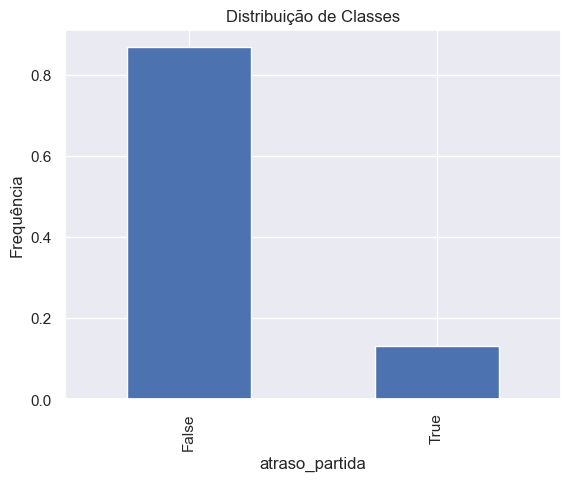

In [6]:
contagem_voos = (dataset_final.groupby('atraso_partida').size()/len(dataset_final))

print('No Horário: {:.2f}%'.format(contagem_voos[0] * 100))
print('Atrasado: {:.2f}%'.format(contagem_voos[1] * 100))

contagem_voos.plot(kind='bar')
plt.ylabel('Frequência')
plt.title('Distribuição de Classes')
plt.show()

Observamos que 86.85% dos voos chegam no horário, mas 13.15% não. Logo, há um desequilíbrio de classes.

**Perguntas**: 

- Quais meses têm mais atrasos?
- Qual dia do mês mais tem atrasos?
- Qual horário do dia tem mais atrasos?
- Qual dia da semana tem mais atrasos?
- Qual turno tem mais atrasos?
- Qual companhia aérea tem mais atrasos?
- Quais aeroportos de origem e destino têm mais atrasos?

In [7]:
dia_da_semana_str = ['segunda-feira', 'terça-feira', 'quarta-feira', 
                     'quinta-feira', 'sexta-feira', 'sábado', 'domingo']

In [8]:
dataset_final['dia_semana_nome'] = dataset_final['dia_semana'].apply(lambda x: dia_da_semana_str[x])

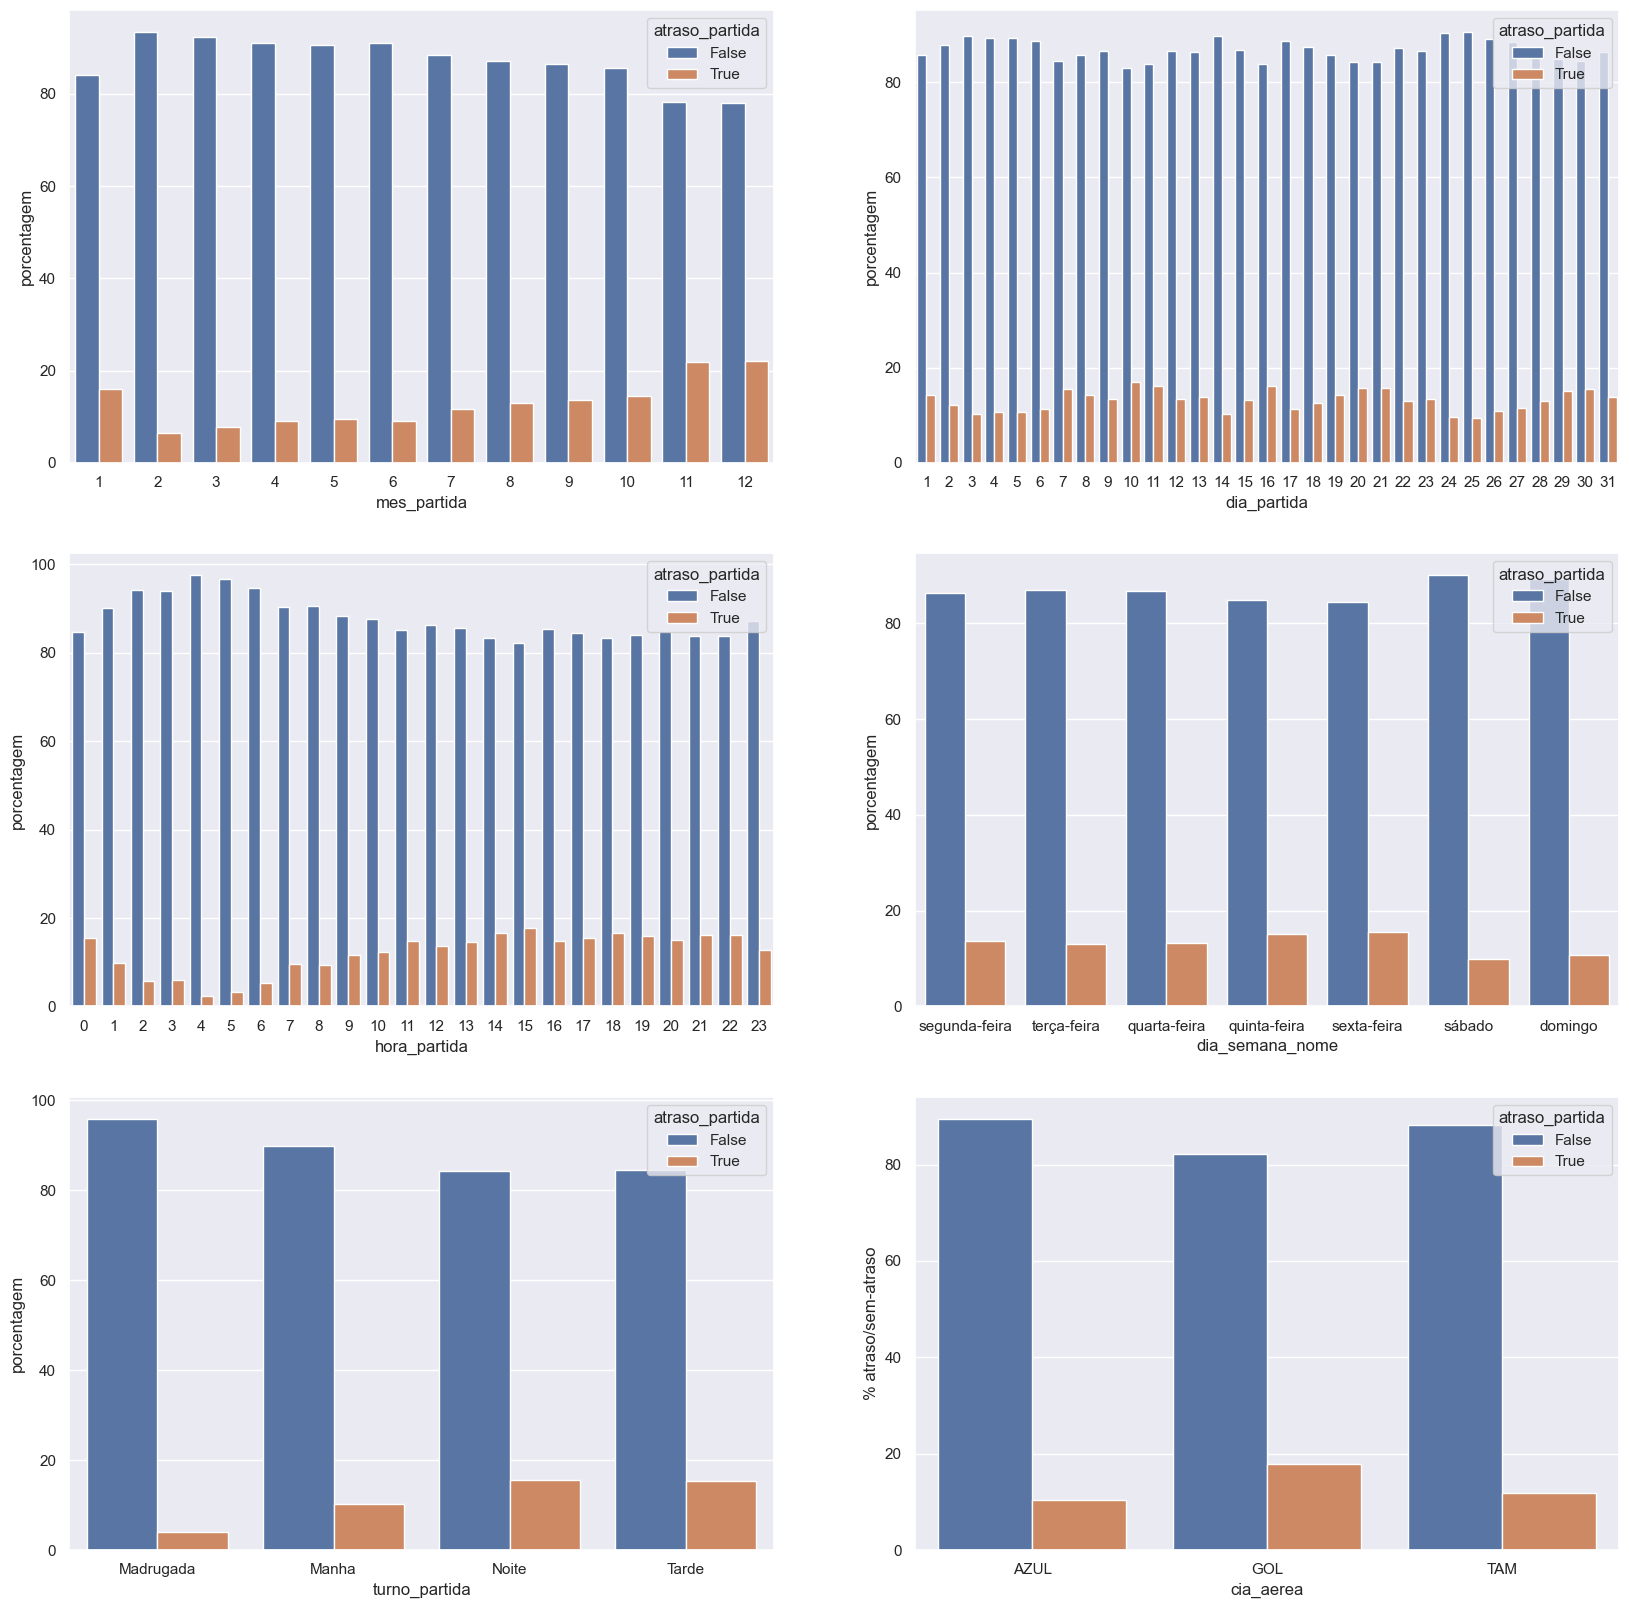

In [9]:
viz_columns = ['mes_partida', 'dia_partida', 'hora_partida', 'dia_semana_nome', 'turno_partida', 'cia_aerea'] 

fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    column_sort = column if column != 'dia_semana_nome' else 'dia_semana'
    column_group = [column] if column != 'dia_semana_nome' else [column,'dia_semana']
    
    temp = dataset_final.groupby(column_group)['atraso_partida'].value_counts(normalize=True).rename('porcentagem').\
    mul(100).reset_index().sort_values(column_sort)
    sns.barplot(x=column, y="porcentagem", hue="atraso_partida", data=temp, ax=ax)
    plt.ylabel('% atraso/sem-atraso')
    

plt.show()

**Observações**
- Há um percentual maior de atraso no final do ano nos meses de Novembro(11) e Dezembro(12) e Janeiro (1).
- Os dias de maior atraso são 10, 11 e 16 do mês.
- O horário de 14 hs e 15 hs possuem maior atraso, seguido pelo horário de 22 hs.
- Os atrasos são maiores no período da noite e a tarde.
- Quinta-feira e Sexta-feira têm atrasos relativamente maiores do que os demais dias.
- A cia aérea de maior atraso é a GOL.

### Relações entrea as variáveis

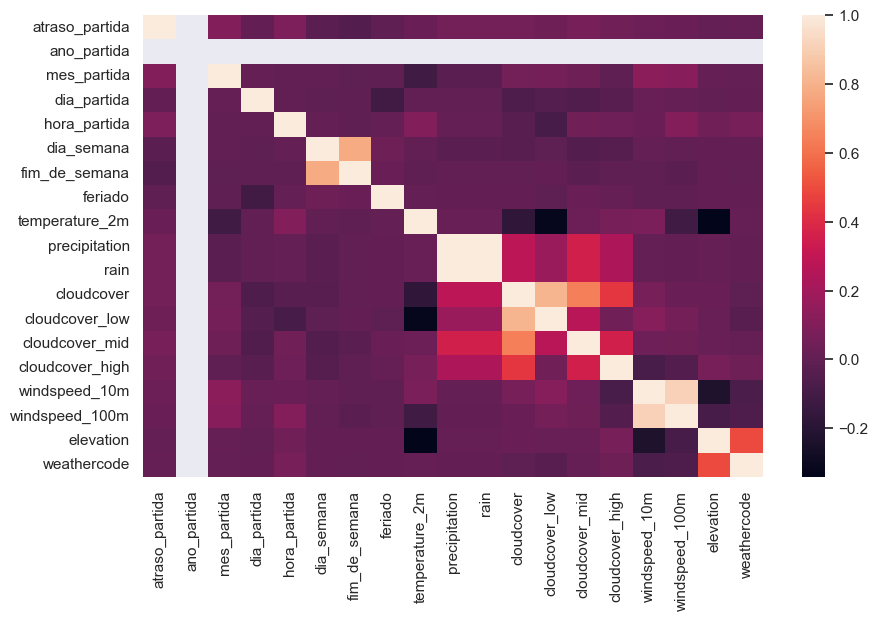

In [10]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(dataset_final.corr(), ax=ax)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


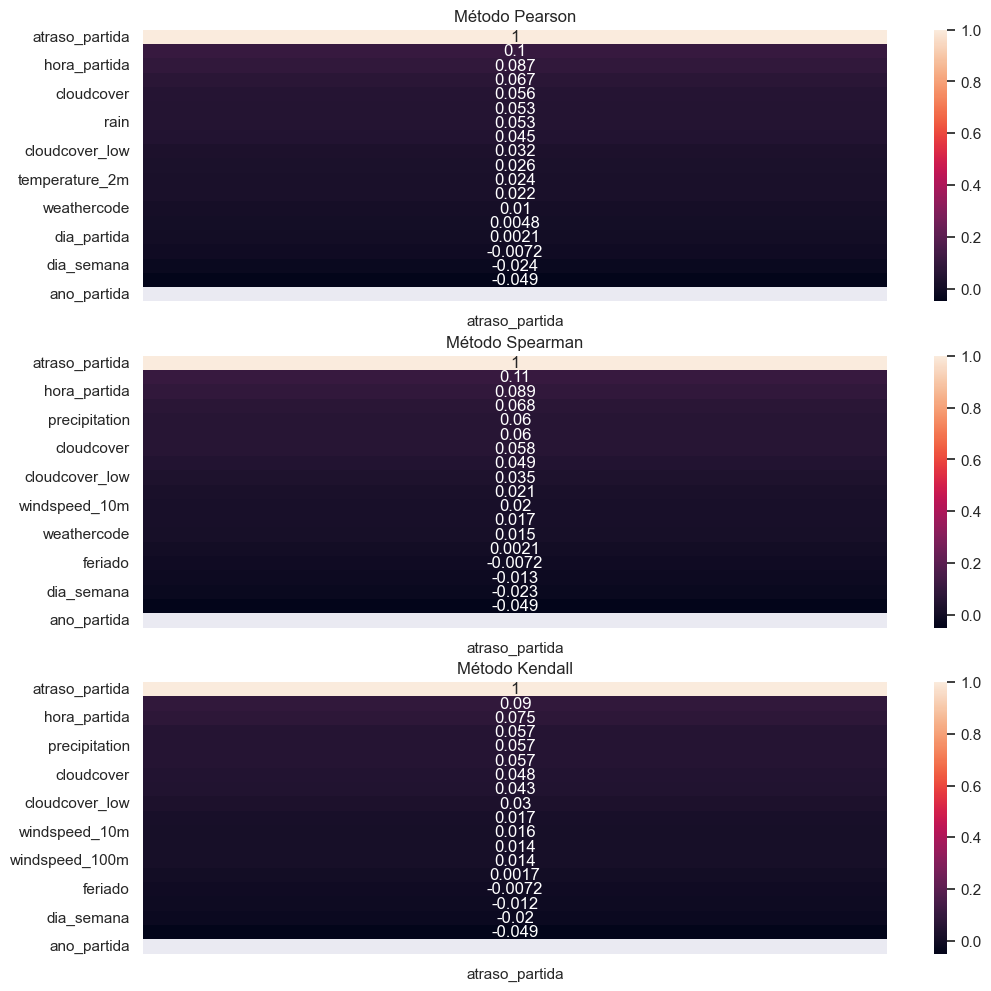

In [11]:
fig, ax = plt.subplots(3,1, figsize=(12, 12))
## Correlation coefficient using different methods
corr1 = dataset_final.corr('pearson')[['atraso_partida']].sort_values(by='atraso_partida', ascending=False)
corr2 = dataset_final.corr('spearman')[['atraso_partida']].sort_values(by='atraso_partida', ascending=False)
corr3 = dataset_final.corr('kendall')[['atraso_partida']].sort_values(by='atraso_partida', ascending=False)

#setting titles for each plot
ax[0].set_title('Método Pearson')
ax[1].set_title('Método Spearman')
ax[2].set_title('Método Kendall')
## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

### Densidade de Variáveis

In [12]:
numeric_cols = ['mes_partida', 'hora_partida','dia_semana', 'temperature_2m',
                'precipitation', 'rain', 'cloudcover', 'cloudcover_low'
               ]

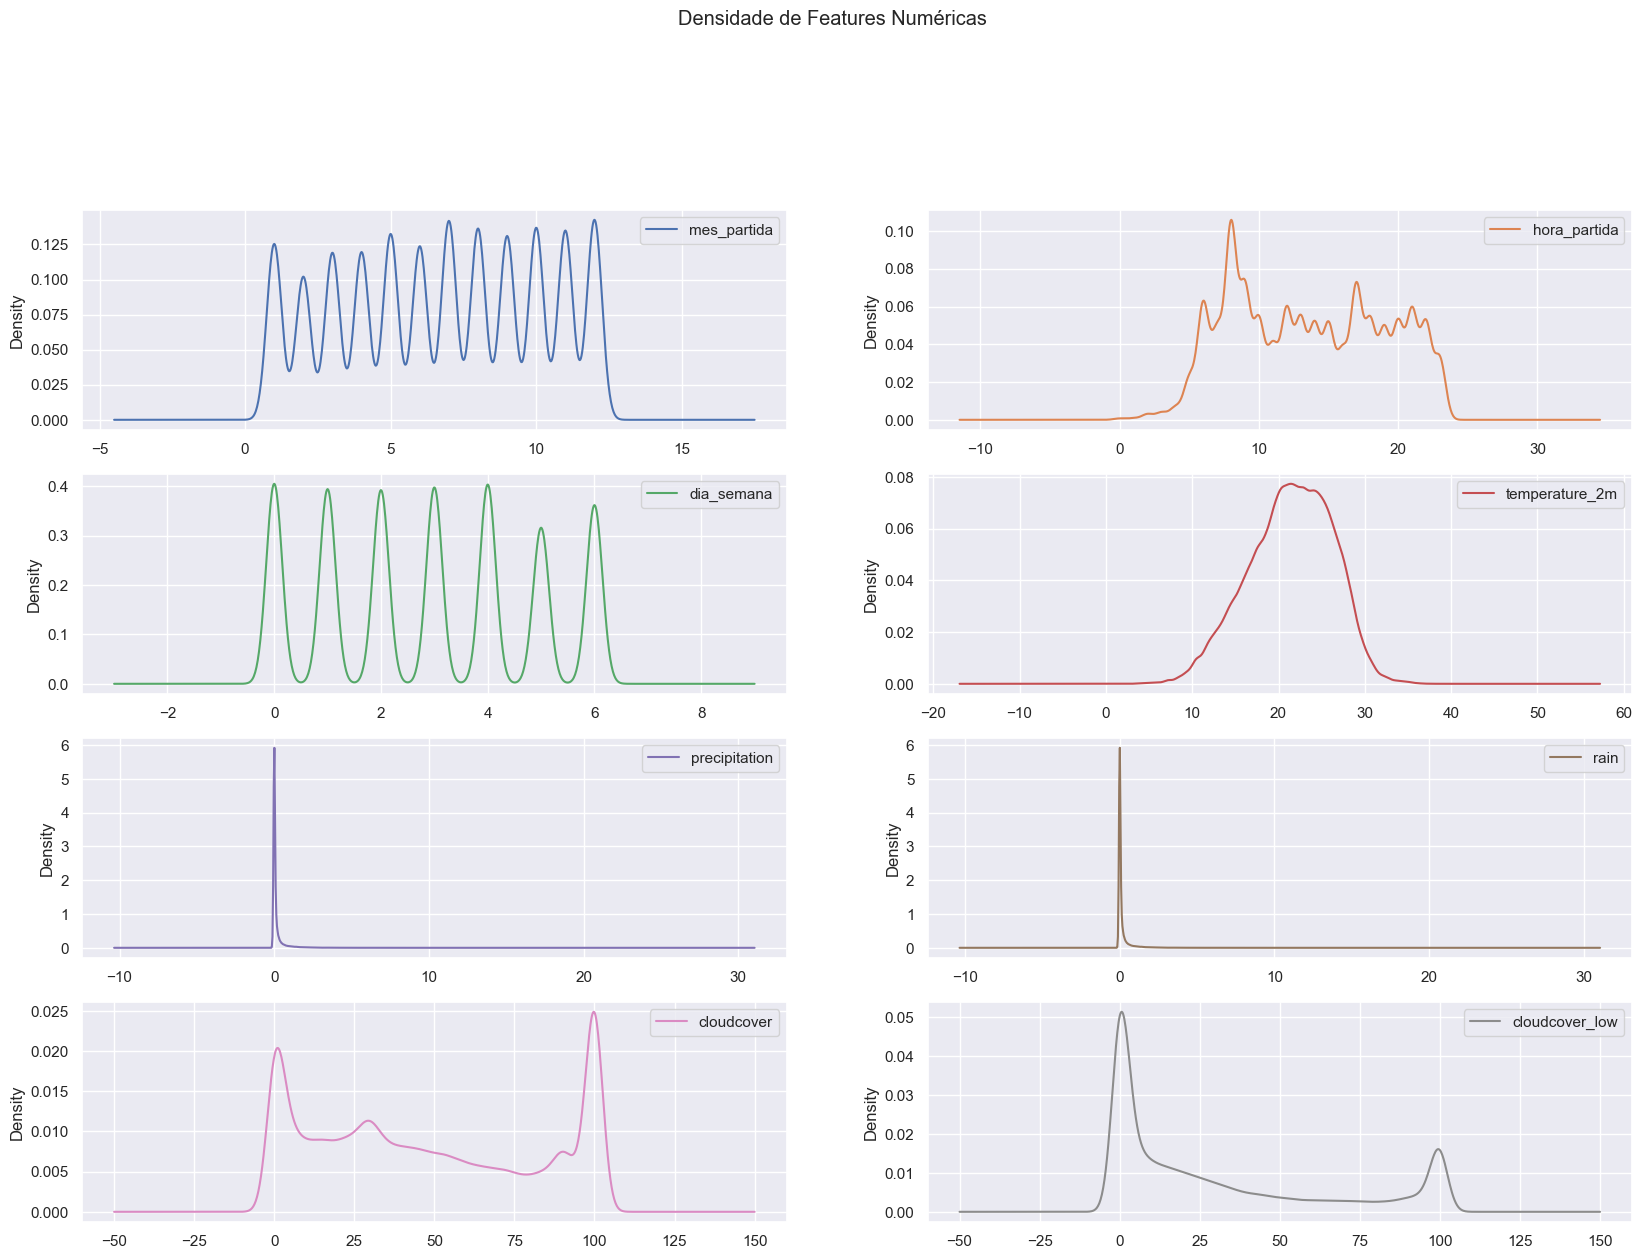

In [13]:
dataset_final[numeric_cols].plot(kind='density',figsize=(20,20),
                    subplots=True,layout=(6,2),
                    title="Densidade de Features Numéricas",sharex=False)
plt.show()

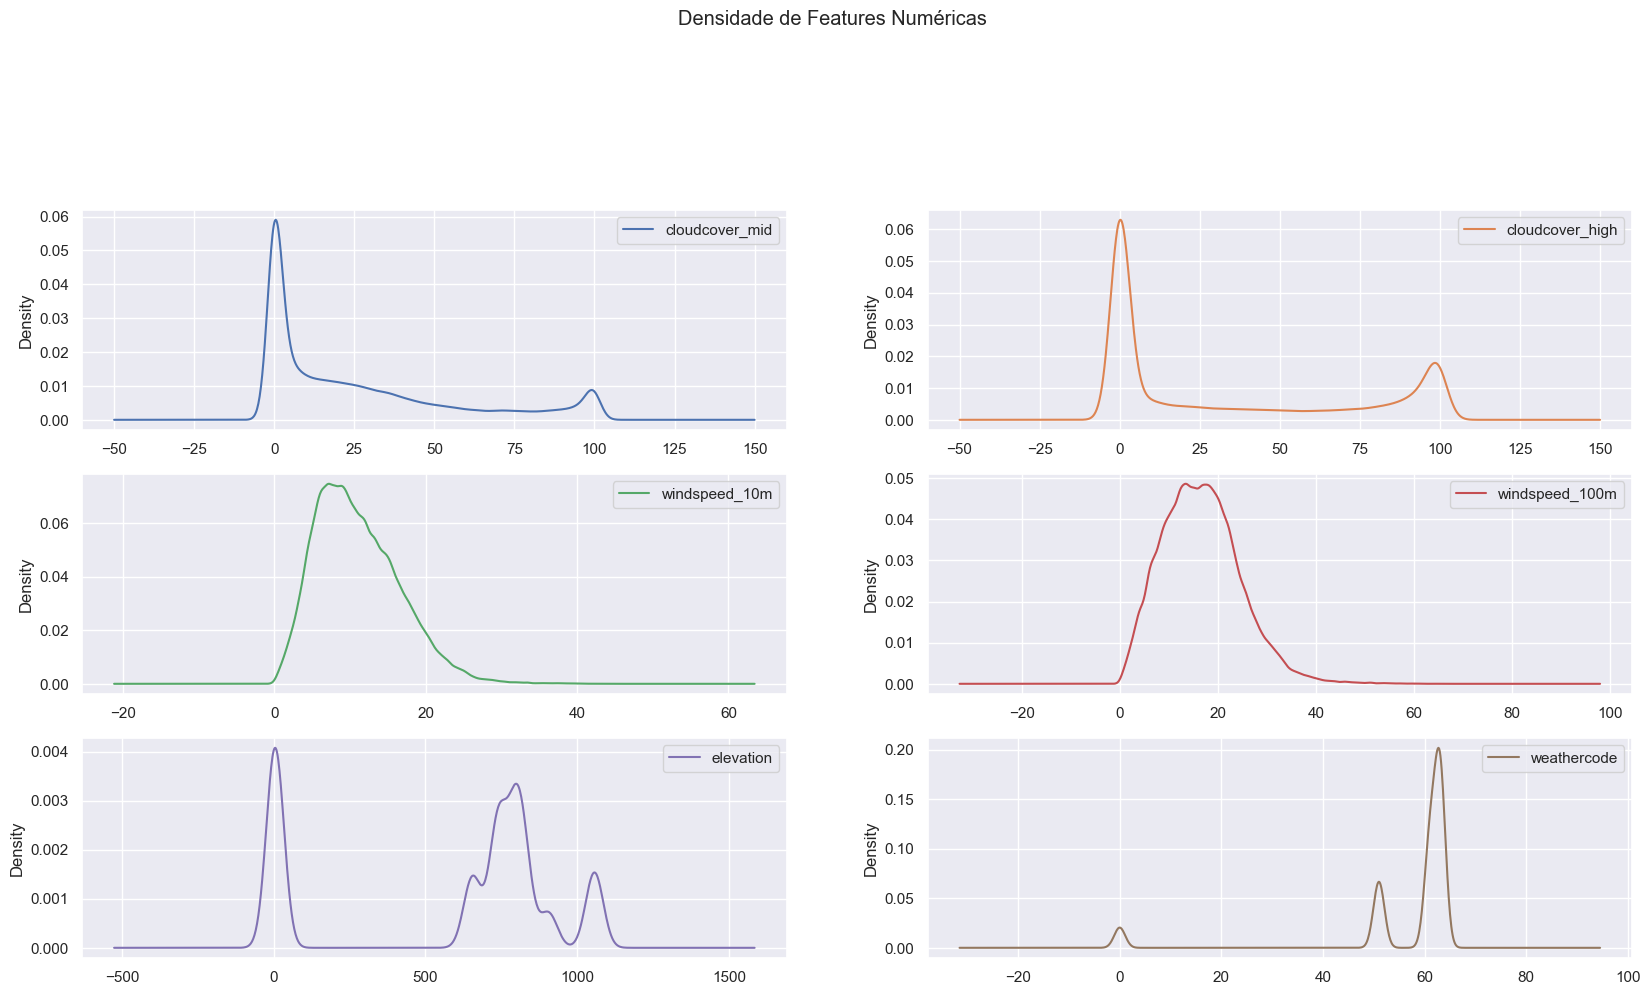

In [14]:
numeric_cols = ['cloudcover_mid', 'cloudcover_high', 
                'windspeed_10m', 'windspeed_100m','elevation', 'weathercode']

dataset_final[numeric_cols].plot(kind='density',figsize=(20,20),
                    subplots=True,layout=(6,2),
                    title="Densidade de Features Numéricas",sharex=False)
plt.show()